In [29]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

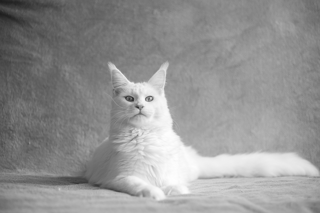

In [30]:
img = Image.open('images/cat.jpeg').convert('L').resize((640 // 2,426 // 2))
img

In [31]:
imgMat = np.array(img)
imgMat

array([[ 30,  30,  34, ..., 114, 113, 112],
       [ 30,  29,  31, ..., 118, 116, 112],
       [ 33,  33,  32, ..., 118, 117, 115],
       ...,
       [122, 122, 121, ..., 113, 115, 116],
       [125, 127, 128, ..., 111, 112, 113],
       [123, 125, 128, ..., 112, 112, 113]], dtype=uint8)

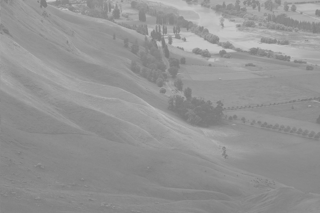

In [32]:
# template image to get histogram
temp = Image.open('images/histo.jpeg').convert('L').resize((640 // 2,426 // 2))
temp

In [33]:
tempMat = np.array(temp)
tempMat

array([[148, 141, 141, ..., 165, 160, 160],
       [143, 138, 143, ..., 150, 141, 139],
       [138, 140, 145, ..., 153, 150, 150],
       ...,
       [137, 133, 132, ..., 143, 145, 146],
       [137, 132, 132, ..., 144, 145, 145],
       [135, 133, 131, ..., 145, 145, 145]], dtype=uint8)

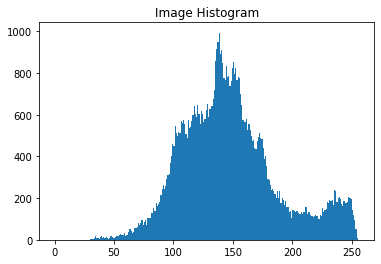

In [34]:
n, bins, patches = plt.hist(imgMat.flatten(),range=(0,256),bins=256)
plt.title('Image Histogram')
plt.show()

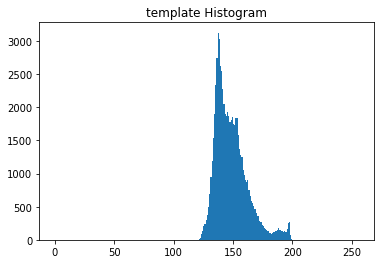

In [35]:
tn, bins, patches = plt.hist(tempMat.flatten(),range=(0,256),bins=256)
plt.title('template Histogram')
plt.show()

In [36]:
normalizedN = n / sum(n)
normalizedT = tn / sum(tn)

In [37]:
cN = np.cumsum(normalizedN)
cT = np.cumsum(normalizedT)

In [38]:
matchedVal = np.interp(cN,cT,np.array([x for x in range(256)])).astype('uint8')

In [39]:
len(matchedVal)

256

In [40]:
matchedImage = []
for i in range(len(imgMat)):
    arr = []
    for j in range(len(imgMat[0])):
        arr.append(matchedVal[imgMat[i][j]])
    matchedImage.append(arr)

In [41]:
final = Image.fromarray(np.array(matchedImage))

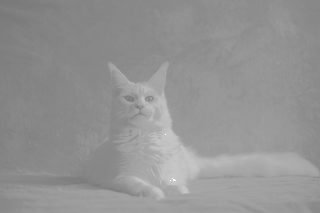

In [42]:
final

In [45]:
final.save('images/match.jpeg')

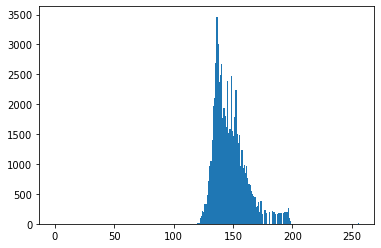

In [44]:
n, bins, patches = plt.hist(np.array(matchedImage).flatten(),range=(0,256),bins=256)
plt.show()